<a href="https://colab.research.google.com/github/Nikhil5566/EDA-Repo/blob/main/Nvdia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('NVDA_1999-01-01_2024-12-04.csv')
df.head(11)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.017325,2714688000
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.019140,510480000
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.017655,343200000
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.017600,244368000
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.017544,227520000
5,1999-01-29,0.041536,0.041667,0.039583,0.039583,0.016720,244032000
6,1999-02-01,0.039583,0.040625,0.039583,0.040365,0.017050,154704000
7,1999-02-02,0.039583,0.040625,0.036068,0.037240,0.015730,264096000
8,1999-02-03,0.036719,0.038542,0.036458,0.038021,0.016060,75120000
9,1999-02-04,0.038542,0.041146,0.038021,0.040104,0.016940,181920000


In [3]:
df.tail(11)

,Date,Open,High,Low,Close,Adj Close,Volume
6498,2024-11-18,139.500000,141.550003,137.149994,140.149994,140.149994,221866000
6499,2024-11-19,141.320007,147.130005,140.990005,147.009995,147.009995,227834900
6500,2024-11-20,147.410004,147.559998,142.729996,145.889999,145.889999,309871700
6501,2024-11-21,149.350006,152.889999,140.699997,146.669998,146.669998,400946600
6502,2024-11-22,145.929993,147.160004,141.100006,141.949997,141.949997,236406200
6503,2024-11-25,141.990005,142.050003,135.820007,136.020004,136.020004,344941900
6504,2024-11-26,137.699997,139.300003,135.669998,136.919998,136.919998,190287700
6505,2024-11-27,135.009995,137.220001,131.800003,135.339996,135.339996,226370900
6506,2024-11-29,136.779999,139.350006,136.050003,138.250000,138.250000,141863200
6507,2024-12-02,138.830002,140.449997,137.820007,138.630005,138.630005,171682800


In [6]:
df.shape

(6509, 7)

In [4]:
df.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Adj Close,float64
Volume,int64


In [5]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6509 entries, 0 to 6508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6509 non-null   object 
 1   Open       6509 non-null   float64
 2   High       6509 non-null   float64
 3   Low        6509 non-null   float64
 4   Close      6509 non-null   float64
 5   Adj Close  6509 non-null   float64
 6   Volume     6509 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 356.1+ KB


In [8]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6509.000000,6509.000000,6509.000000,6509.000000,6509.000000,6.509000e+03
mean,7.846563,7.989922,7.689917,7.846531,7.679767,6.017739e+08
std,21.342285,21.722479,20.897965,21.325616,21.373121,4.311185e+08
min,0.034896,0.035547,0.033333,0.034115,0.014410,1.968000e+07
25%,0.279427,0.287250,0.272250,0.279250,0.117953,3.413160e+08
50%,0.462750,0.469500,0.456250,0.463000,0.212784,5.033400e+08
75%,4.450750,4.514500,4.378250,4.466500,4.219250,7.326760e+08
max,149.350006,152.889999,146.259995,148.880005,148.880005,9.230856e+09


In [20]:
df.nunique()

,0
Date,6509
Open,4953
High,4928
Low,4915
Close,5068
Adj Close,5466
Volume,6425


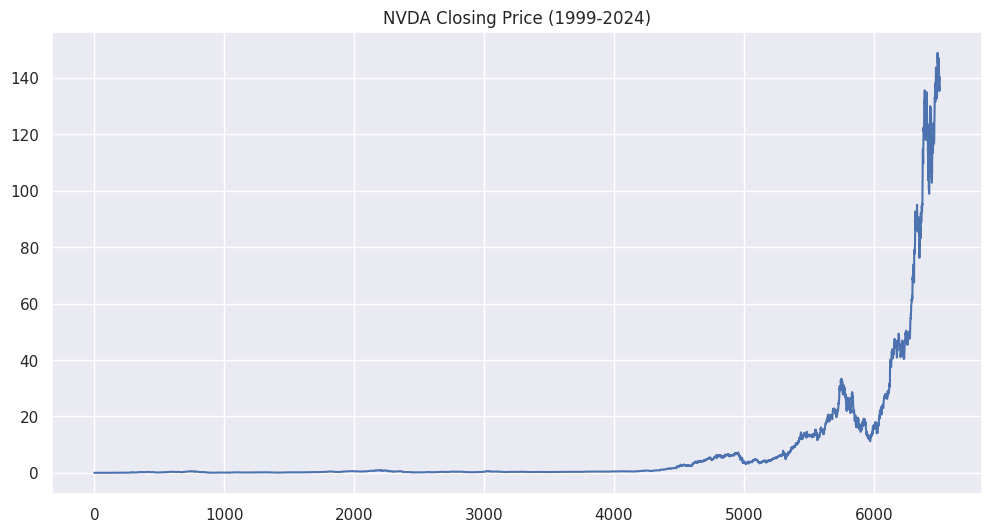

In [10]:
ts = df['Close'].dropna()
ts.plot(title='NVDA Closing Price (1999-2024)', figsize=(12, 6))
plt.show()

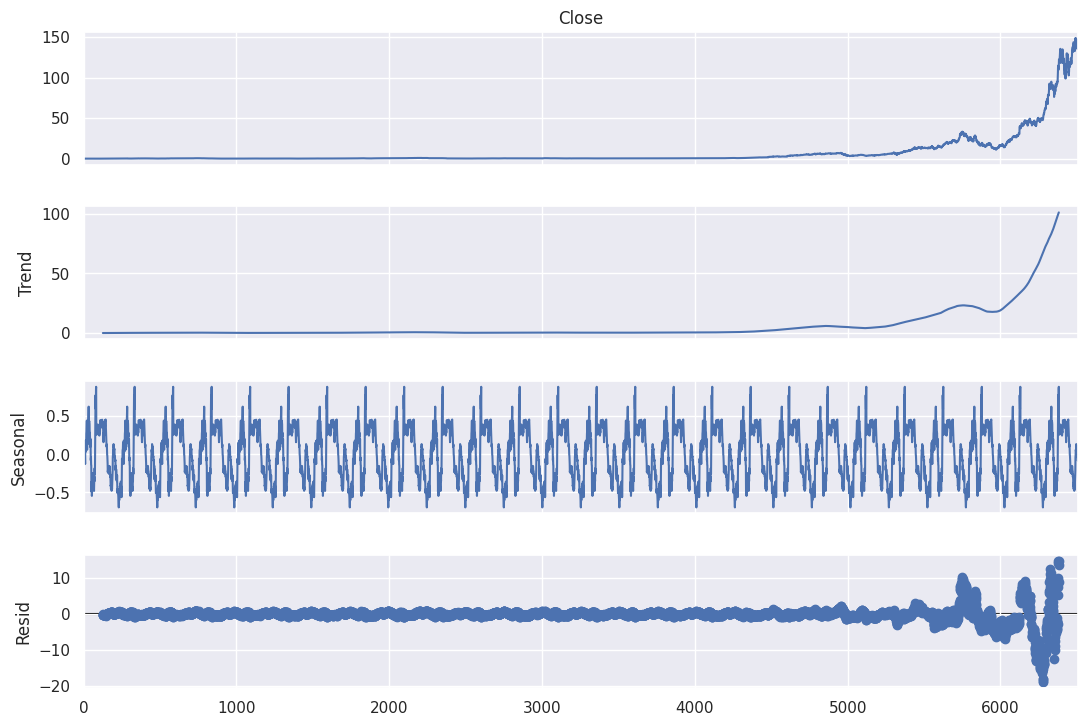

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose (assuming no strong seasonality; use additive model)
decomposition = seasonal_decompose(ts, model='additive', period=252)  # 252 trading days/year
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(ts)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

ADF Statistic: 6.964249044947002
p-value: 1.0


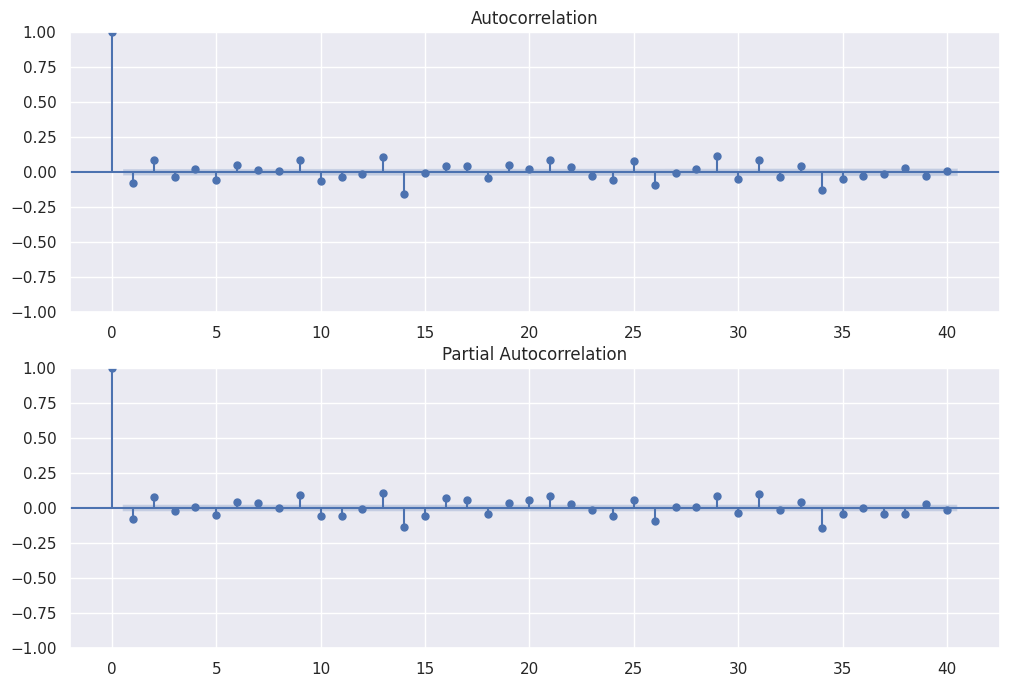

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF/PACF of differenced series
diff_ts = ts.diff().dropna()
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(diff_ts, lags=40, ax=ax1)
plot_pacf(diff_ts, lags=40, ax=ax2)
plt.show()

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(1,1,1)
model = ARIMA(ts, order=(1, 1, 1))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 6509
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7161.095
Date:                Sun, 30 Mar 2025   AIC                          14328.189
Time:                        19:18:18   BIC                          14348.532
Sample:                             0   HQIC                         14335.225
                               - 6509                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6952      0.012    -57.182      0.000      -0.719      -0.671
ma.L1          0.6124      0.014     44.972      0.000       0.586       0.639
sigma2         0.5288      0.002    344.279      0.0

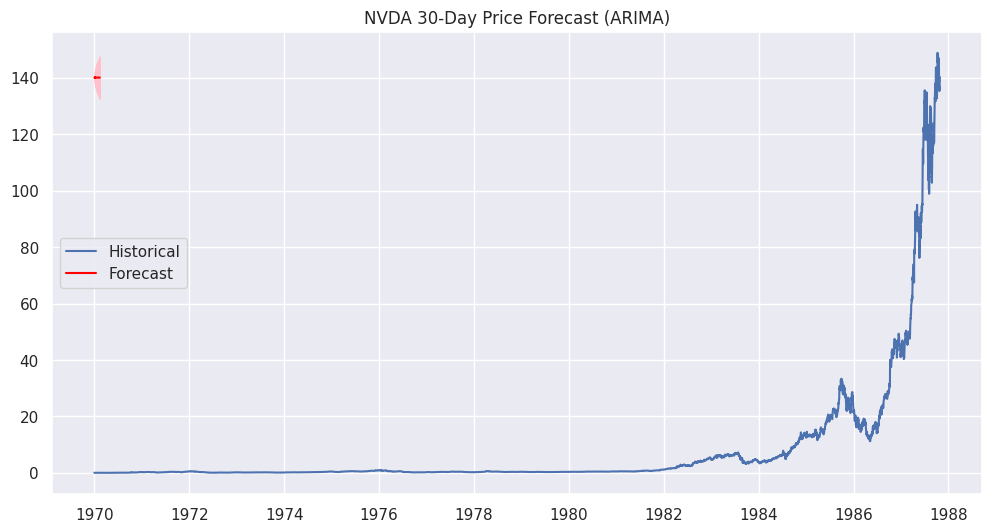

In [15]:
# Forecast next 30 days
forecast = results.get_forecast(steps=30)
conf_int = forecast.conf_int()
forecast_index = pd.date_range(ts.index[-1], periods=31, freq='B')[1:]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(ts.index, ts, label='Historical')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink')
plt.title('NVDA 30-Day Price Forecast (ARIMA)')
plt.legend()
plt.show()

In [ ]:
# Thank you